In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.metrics import confusion_matrix  , accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('iris.csv') 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
x=df.drop('Species',axis=1)
y=df['Species']
print(x)
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [8]:
x_train.shape


(120, 5)

In [7]:
x_test.shape

(30, 5)

In [9]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()

In [11]:
clf.fit(x_train,y_train)

GaussianNB()

In [15]:
y_test_pred=clf.predict(x_test)

In [16]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

<Axes: >

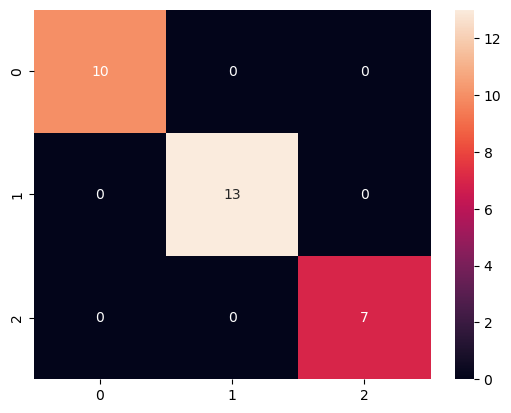

In [17]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [19]:
accuracy = accuracy_score(y_test, y_test_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_test_pred ,average='micro')
recall = recall_score(y_test, y_test_pred,average='micro')
f1 = f1_score(y_test, y_test_pred,average='micro')

In [20]:
# Print the confusion matrix and performance metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
"""
TP (True Positive): The number of true positive predictions. 
It represents the cases where the model predicted the positive class correctly.

FP (False Positive): The number of false positive predictions. 
It represents the cases where the model predicted the positive class incorrectly.

TN (True Negative): The number of true negative predictions. 
It represents the cases where the model predicted the negative class correctly.

FN (False Negative): The number of false negative predictions. 
It represents the cases where the model predicted the negative class incorrectly.

Accuracy: It is the ratio of correctly predicted samples (TP + TN) to the total number of samples. 
It measures the overall correctness of the model's predictions.

Error Rate: It is the ratio of incorrectly predicted samples (FP + FN) to the total number of samples. 
It measures the overall incorrectness of the model's predictions.

Precision: It is the ratio of true positive predictions (TP) to the total predicted positive samples (TP + FP). 
It measures the proportion of correctly predicted positive samples out of all predicted positive samples. Precision indicates how well the model performs when it predicts the positive class.

Recall: It is the ratio of true positive predictions (TP) to the total actual positive samples (TP + FN). 
It measures the proportion of correctly predicted positive samples out of all actual positive samples. 
Recall indicates how well the model captures the positive class.

F1 Score: It is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall. 
The F1 score is useful when the dataset is imbalanced or when both precision and recall need to be considered.

These metrics are commonly used to evaluate the performance of classification models. 
They provide insights into how well the model is performing in terms of correctly identifying positive and negative samples.

A confusion matrix is a table that is used to define the performance of a classification algorithm. 
A confusion matrix visualizes and summarizes the performance of a classification algorithm.


Important terminologies in Naive Bayes classification include:
- Prior probability: The probability of a class occurring in the dataset before considering any evidence.
- Likelihood: The probability of observing the feature vector given a specific class.
- Posterior probability: The probability of a class given the observed feature vector.
- Evidence: The probability of observing the feature vector.

To compute the confusion matrix, we need the dataset, the predicted class labels, and the actual class labels. 
The confusion matrix provides information on true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). From the confusion matrix, we can calculate accuracy, error rate, precision, recall, and F1 score.

- Accuracy: (TP + TN) / (TP + FP + TN + FN)
- Error rate: (FP + FN) / (TP + FP + TN + FN)
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1 score: 2 * (Precision * Recall) / (Precision + Recall)


"""